In [75]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import os.path
import sys
from os import path
sns.set_theme(style="whitegrid")

In [5]:
def get_edge_features(dataset):
    nodes_info = pd.read_csv(f"{dataset}/nodeQualityFeatures.txt", sep="\t")
    nodes_info['out_homophily'] = [row['redNeighborsOutRatio'] if row['group'] == 1 else 1 - row['redNeighborsOutRatio']
                               for i, row in nodes_info.iterrows()]
    edges_scores = pd.read_csv(f"{dataset}/deletion_scores.txt")
    df = edges_scores.join(nodes_info.set_index("nodeId"), on="Source", rsuffix="source")
    df = df.join(nodes_info.set_index("nodeId"), on="Target", lsuffix="_source", rsuffix="_target")
    df = df.sort_values(axis=0, by="Score", ascending=False)
    df["red_pagerank_dif"] = df["redPagerank_target"] - df["redPagerank_source"]
    # 2 * a + 1 * b.
    # 0: blue to blue, 1: blue to red, 2: red to blue, 3 red to red
    df["edge_group"] = (2 * df["group_source"]) + df["group_target"]
    
    # To get distances ##################
    edges = [(i, j) for i,j in zip(df.Source, df.Target)]
    f = open(f"{dataset}/out_graph.txt")
    lines = f.readlines()
    f.close()
    G = nx.parse_edgelist(lines[1:], nodetype=int, create_using=nx.DiGraph)
    dist = list()
    for e in edges:
        try:
            length = len(nx.shortest_path(G, source=e[1], target=e[0])) - 1
            dist.append(length)
        except nx.NetworkXNoPath:
            dist.append(float("Inf"))
    df["Distance"] = dist
    #####################################
    
    return df
 

In [78]:
dblp_c = get_edge_features("dblp_course")
dblp_g = get_edge_features("dblp_new_gender")
dblp_p = get_edge_features("dblp_new_pubs")
#books = get_edge_features("books")
#blogs = get_edge_features("blogs")
#twitter = get_edge_features("twitter")

In [7]:
dblp_c

,Source,Target,Score,pagerank_source,redPagerank_source,group_source,inDegree_source,outDegree_source,redNeighborsInRatio_source,redNeighborsOutRatio_source,...,redPagerank_target,group_target,inDegree_target,outDegree_target,redNeighborsInRatio_target,redNeighborsOutRatio_target,out_homophily_target,red_pagerank_dif,edge_group,Distance
35176,6779,3940,0.000058,0.000063,0.277160,0,2,2,0.500000,0.500000,...,0.416555,1,3,3,0.333333,0.333333,0.333333,0.139395,1,1
31398,6286,5385,0.000056,0.000069,0.214332,0,3,3,0.333333,0.333333,...,0.439628,1,58,58,0.327586,0.327586,0.327586,0.225296,1,1
14128,3825,6791,0.000056,0.000053,0.481202,1,2,2,0.500000,0.500000,...,0.601685,1,6,6,0.333333,0.333333,0.333333,0.120483,3,1
14528,3898,6394,0.000052,0.000079,0.274488,0,3,3,0.333333,0.333333,...,0.527321,1,3,3,0.666667,0.666667,0.666667,0.252833,1,1
50301,8602,8604,0.000051,0.000059,0.216480,0,2,2,0.500000,0.500000,...,0.325356,1,13,13,0.076923,0.076923,0.076923,0.108876,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57062,9726,6049,-0.000109,0.000049,0.461447,1,2,2,0.500000,0.500000,...,0.190586,0,19,19,0.315789,0.315789,0.684211,-0.270861,2,1
6579,1951,6160,-0.000116,0.000054,0.420734,1,2,2,0.500000,0.500000,...,0.129397,0,6,6,0.166667,0.166667,0.833333,-0.291337,2,1
16118,4167,7221,-0.000117,0.000056,0.458091,1,2,2,0.500000,0.500000,...,0.185543,0,9,9,0.333333,0.333333,0.666667,-0.272548,2,1
30706,6201,5654,-0.000123,0.000050,0.412376,1,2,2,0.500000,0.500000,...,0.116835,0,53,53,0.113208,0.113208,0.886792,-0.295541,2,1


In [13]:
dblp_c["dataset"] = "course"
dblp_g["dataset"] = "gender"
dblp_p["dataset"] = "pubs"

In [14]:
frames = [dblp_c, dblp_g, dblp_p]
df = pd.concat(frames)

<IPython.core.display.Javascript object>


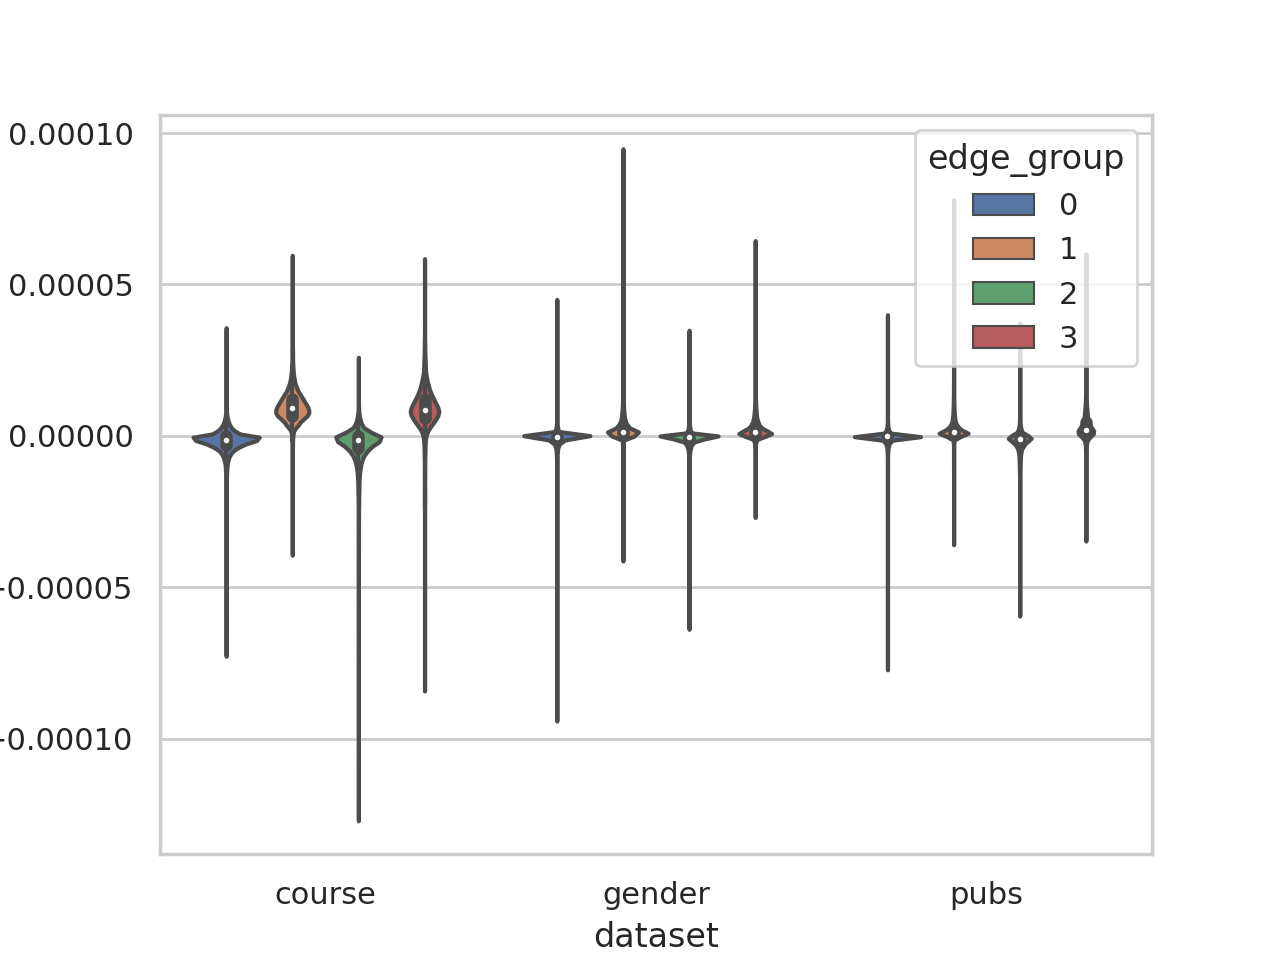

In [15]:
sns.violinplot(x="dataset", y="Score", hue="edge_group", data=df)

<IPython.core.display.Javascript object>


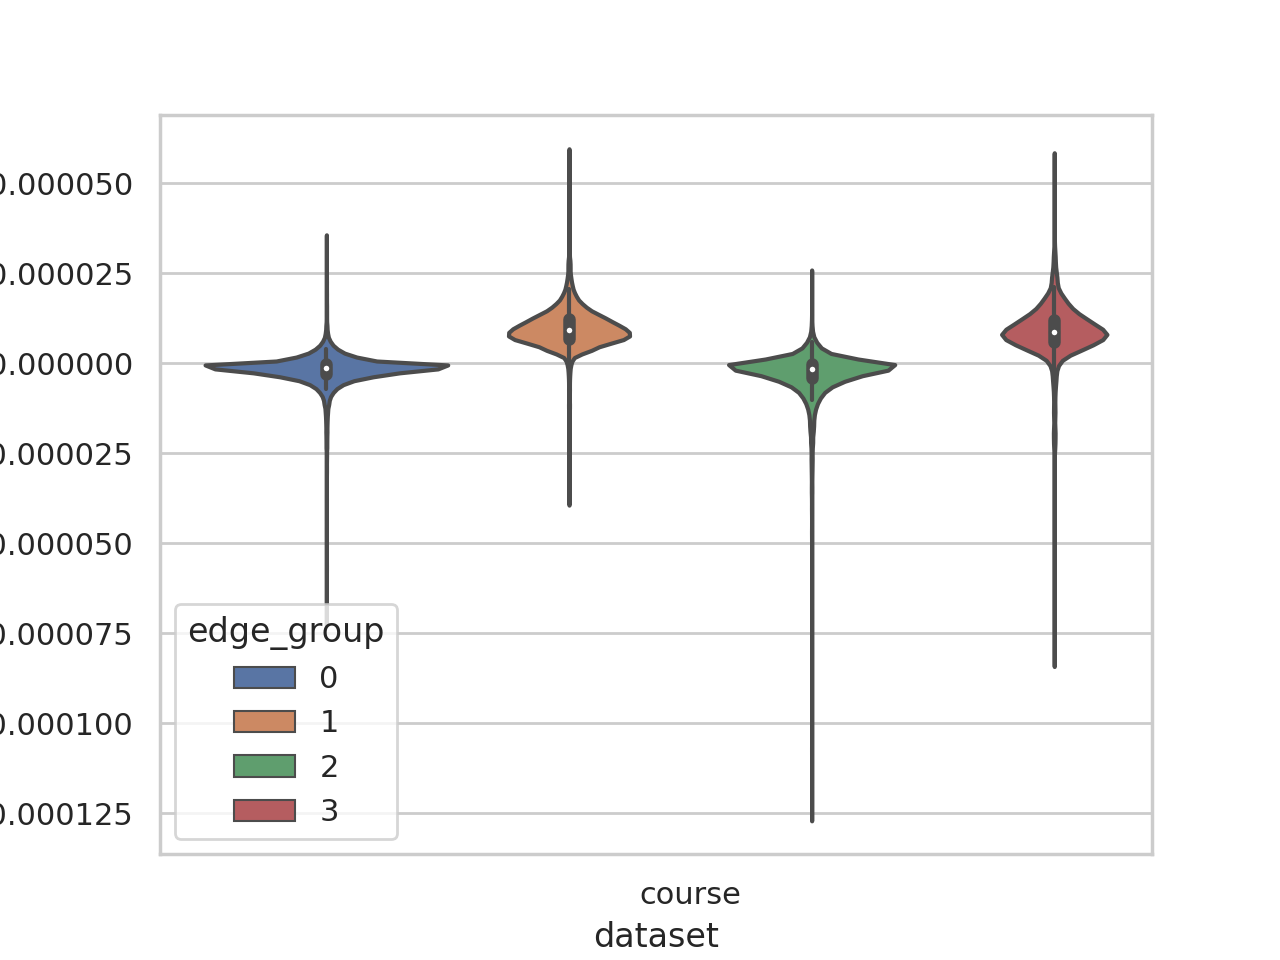

In [16]:
sns.violinplot(x="dataset", y="Score", hue="edge_group", data=dblp_c)

<IPython.core.display.Javascript object>


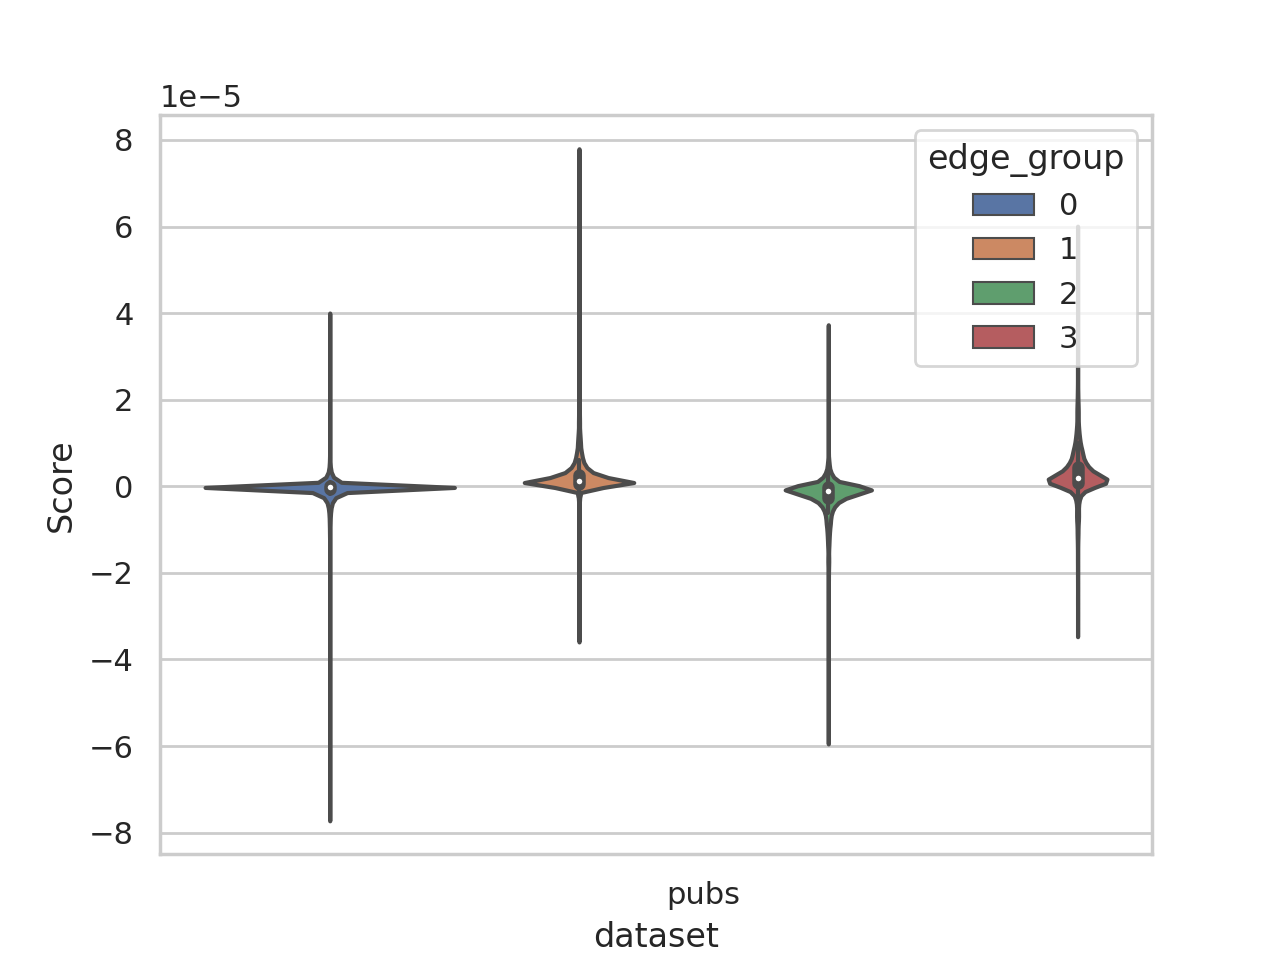

In [17]:
sns.violinplot(x="dataset", y="Score", hue="edge_group", data=dblp_p)

<IPython.core.display.Javascript object>


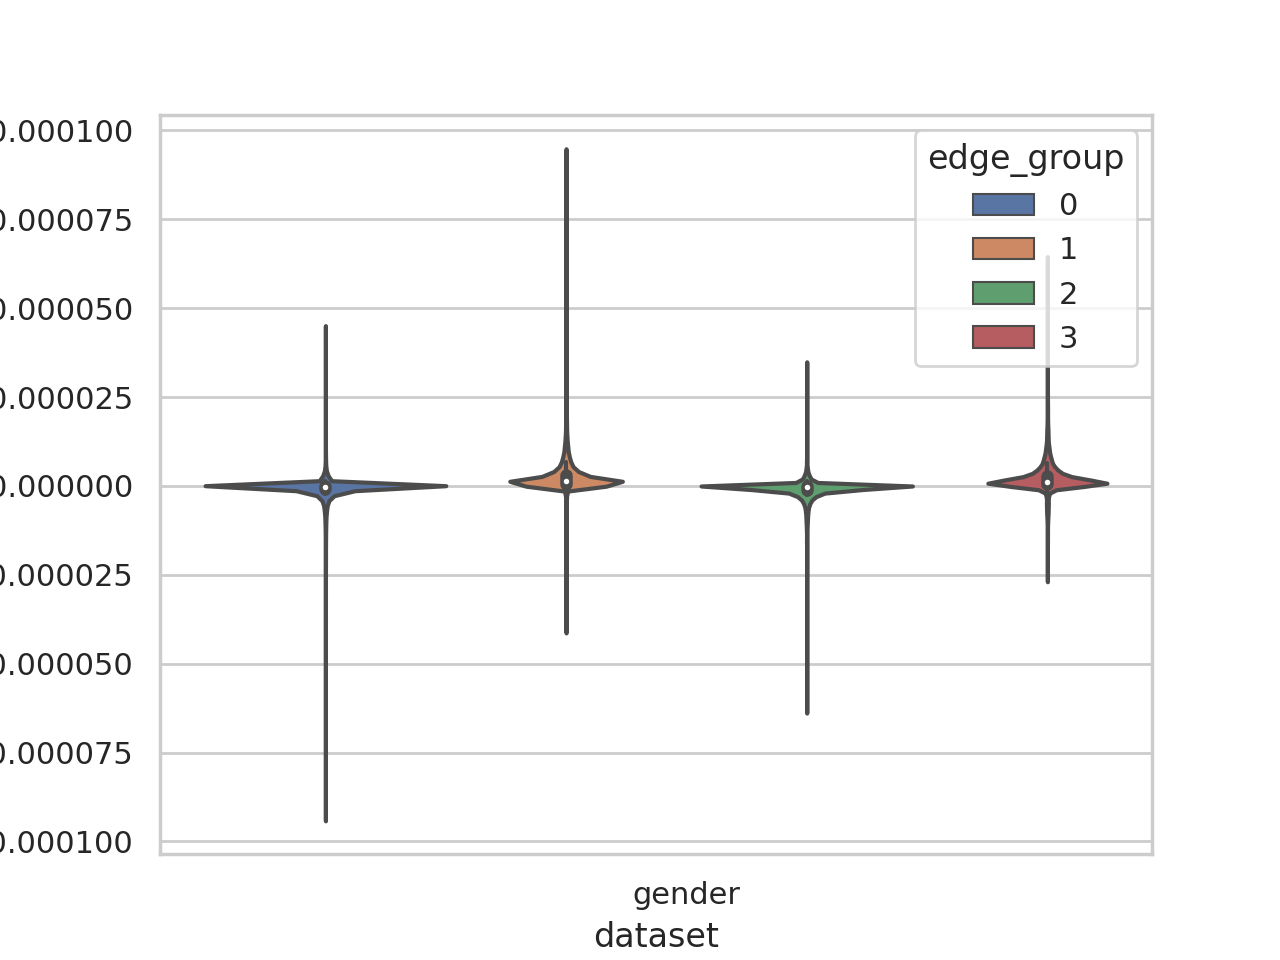

In [18]:
sns.violinplot(x="dataset", y="Score", hue="edge_group", data=dblp_g)

# Names

In [65]:
dblp_c_best = dblp_c.head(20)[["Source", "Target", "Score"]]
dblp_c_worst = dblp_c.tail(20)[["Source", "Target", "Score"]]
dblp_g_best = dblp_g.head(20)[["Source", "Target", "Score"]]
dblp_g_worst = dblp_g.tail(20)[["Source", "Target", "Score"]]
dblp_p_best = dblp_p.head(20)[["Source", "Target", "Score"]]
dblp_p_worst = dblp_p.tail(20)[["Source", "Target", "Score"]]


In [66]:
dblp_c_names = pd.read_csv("dblp_course/names.txt", sep="\t")
dblp_g_names = pd.read_csv("dblp_new_gender/names.txt", sep="\t")
dblp_p_names = pd.read_csv("dblp_new_pubs/names.txt", sep="\t")

In [67]:
df_c_best = dblp_c_best.join(dblp_c_names.set_index("Node_id"), on="Source", rsuffix="source" )
df_c_best = df_c_best.join(dblp_c_names.set_index("Node_id"), on="Target", lsuffix="_Source", rsuffix="_Target")
df_g_best = dblp_g_best.join(dblp_g_names.set_index("Node_id"), on="Source", rsuffix="source" )
df_g_best = df_g_best.join(dblp_g_names.set_index("Node_id"), on="Target", lsuffix="_Source", rsuffix="_Target")
df_p_best = dblp_p_best.join(dblp_p_names.set_index("Node_id"), on="Source", rsuffix="source" )
df_p_best = df_p_best.join(dblp_p_names.set_index("Node_id"), on="Target", lsuffix="_Source", rsuffix="_Target")


df_c_worst = dblp_c_worst.join(dblp_c_names.set_index("Node_id"), on="Source", rsuffix="source" )
df_c_worst = df_c_worst.join(dblp_c_names.set_index("Node_id"), on="Target", lsuffix="_Source", rsuffix="_Target")
df_g_worst = dblp_g_worst.join(dblp_g_names.set_index("Node_id"), on="Source", rsuffix="source" )
df_g_worst = df_g_worst.join(dblp_g_names.set_index("Node_id"), on="Target", lsuffix="_Source", rsuffix="_Target")
df_p_worst = dblp_p_worst.join(dblp_p_names.set_index("Node_id"), on="Source", rsuffix="source" )
df_p_worst = df_p_worst.join(dblp_p_names.set_index("Node_id"), on="Target", lsuffix="_Source", rsuffix="_Target")

In [68]:
df_g_best.columns

Index(['Source', 'Target', 'Score', 'Author_Name_Source',
       'Author_Name_Target'],
      dtype='object')

In [69]:
df_c_best = df_c_best[['Autor_Name_Source', "Autor_Name_Target", "Score"]]
df_c_worst = df_c_worst[["Autor_Name_Source", "Autor_Name_Target", "Score"]].sort_values(axis=0, by="Score")
df_g_best = df_g_best[["Author_Name_Source", "Author_Name_Target", "Score"]]
df_g_worst = df_g_worst[["Author_Name_Source", "Author_Name_Target", "Score"]].sort_values(axis=0, by="Score")
df_p_best = df_p_best[["Author_Name_Source", "Author_Name_Target", "Score"]]
df_p_worst = df_p_worst[["Author_Name_Source", "Author_Name_Target", "Score"]].sort_values(axis=0, by="Score")

In [74]:
latex_table = list()
i = 0
for index, row in df_p_best.iterrows():
    latex_table.append(str(i + 1))
    for label, value in row.iteritems():
        value_t = round(value, 6) if type(value) is float else value
        latex_table[i] += " & " + str(value_t)
    i += 1

i = 0
for index, row in df_p_worst.iterrows():
    for label, value in row.iteritems():
        value_t = round(value, 6) if type(value) is float else value
        latex_table[i] += " & " + str(value_t)
    i += 1

# Print table in latex code.
print("\\hline")
print("Order & Source & Target & Score & Source & Target & Score")
print("\\hline")
for row in latex_table:
    print(row + "\\\\")
    print("\\hline")

\hline
Order & Source & Target & Score & Source & Target & Score
\hline
1 & Hsiao-Ping Tseng & Ravi Kiran Holur Vijay & 7.7e-05 & Hsiao-Ping Tseng & Xiaoyu Chen & -7.7e-05\\
\hline
2 & Florian M. Waas & Derrick Bryant & 7e-05 & Florian M. Waas & Tuan Cao & -7e-05\\
\hline
3 & Xianjing Han & Haokun Wen & 5.8e-05 & Xianjing Han & Jie Nie & -5.8e-05\\
\hline
4 & Cheng Luo 0001 & Zhen Fan 0003 & 5.8e-05 & Cheng Luo 0001 & Xiaochuan Wang & -5.8e-05\\
\hline
5 & Xiaotong Shen & Ruiwen Zhang & 4.6e-05 & Xiaotong Shen & Yunzhang Zhu & -4.6e-05\\
\hline
6 & Philip Gautier & David Arpin & 4.4e-05 & Philip Gautier & Lorenzo Stella & -4.4e-05\\
\hline
7 & David Mares & Dipak K. Gupta & 4.1e-05 & David Mares & Alla Rozovskaya & -4.1e-05\\
\hline
8 & Taylor Berg-Kirkpatrick & Junxian He & 4.1e-05 & Taylor Berg-Kirkpatrick & Vern Paxson & -4.1e-05\\
\hline
9 & Renato Marroquin & Ken Tsay & 4.1e-05 & Renato Marroquin & Lucas Braun & -4.1e-05\\
\hline
10 & Nesime Tatbul & Franco Solleza & 4.1e-05 & Nes

## Correlations

In [ ]:
# Pearson.
# Initialization and books.
temp_cor = books.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]
values = list()
for label, value in temp_cor.iteritems():
    values.append(str(label) + " & " + str(round(value, 2)))

# Blogs.
temp_cor = blogs.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Dblp.
temp_cor = dblp.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Twitter.
temp_cor = twitter.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# dblp gender.
temp_cor = dblp_g.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# dblp_pubs.
temp_cor = dblp_p.corr(method="pearson").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1
# Spearman
# Books.
temp_cor = books.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1
# Blogs.
temp_cor = blogs.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Dblp.
temp_cor = dblp.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# Twitter.
temp_cor = twitter.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1

# dblp gender.
temp_cor = dblp_g.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1
    
# dblp pubs.
temp_cor = dblp_p.corr(method="spearman").Score[["pagerank_source", "redPagerank_source", "group_source", "inDegree_source",
                                               "outDegree_source", "redNeighborsInRatio_source", "redNeighborsOutRatio_source",
                                               "out_homophily_source", "pagerank_target", "redPagerank_target", "group_target",
                                               "inDegree_target", "outDegree_target", "redNeighborsInRatio_target",
                                               "redNeighborsOutRatio_target", "out_homophily_target", "red_pagerank_dif"]]

i = 0
for label, value in temp_cor.iteritems():
    values[i] += " & " + str(round(value, 2))
    i += 1
    
# Print latex table.
print("\\hline")
print("Metric & Books & Blogs & DBLP & Twitter & Books & Blogs & DBLP & Twitter \\\\")
print("\\hline")
for i in values:
    print(i + " \\\\")
    print("\\hline")